In [425]:
import scipy.io as io
import matplotlib.pyplot as plt
import pandas as pd
from obspy.geodetics.base import gps2dist_azimuth
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

## Import data

In [3]:
mat = io.loadmat('class 2/matfiles/Arr.mat')
GPStime = pd.read_csv('gpstime.csv',names=['time'])
GPSlat = pd.read_csv('gps_lat.csv',names=['AUV','Buoy','Ship'])
GPSlon = pd.read_csv('gps_lon.csv',names=['AUV','Buoy','Ship'])

In [4]:
rows = mat['Arr'][0]  ## 6
columns = mat['Arr'][0][0] ##7
time = mat['Arr'][0][0][0] ##121
data = mat['Arr'][0][0][0][0] ##3000

In [5]:
mdata = mat['Arr']
mdtype = mat['Arr'].dtype
BuoytoShip_data = {n: mdata[n][0,3] for n in mdtype.names}
ShiptoBuoy_data = {n: mdata[n][0,5] for n in mdtype.names}


## Plot data

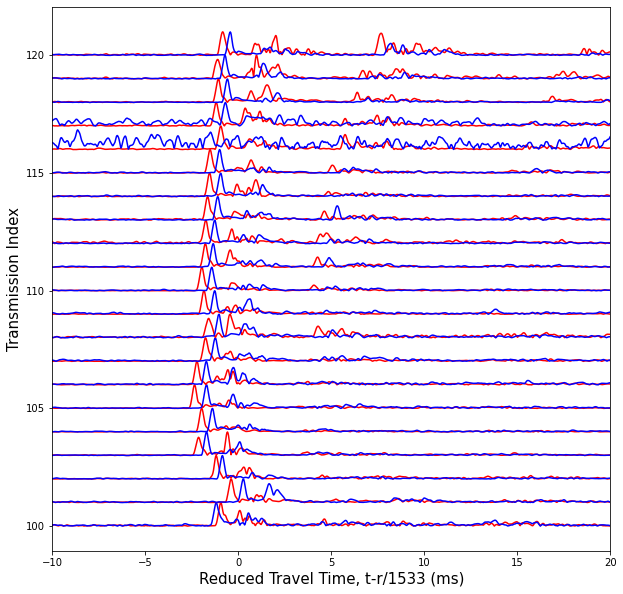

In [26]:
plt.figure(figsize=(10,10))
vel = 1533
for i in range(100,121):
    
    Buoy_lat = 25+GPSlat['Buoy'].values[i]/60
    Buoy_lon = 121+GPSlon['Buoy'].values[i]/60
    Ship_lat = 25+GPSlat['Ship'].values[i]/60
    Ship_lon = 121+GPSlon['Ship'].values[i]/60
    dist,az,baz = gps2dist_azimuth(Ship_lat,Ship_lon,Buoy_lat,Buoy_lon)
    # print(dist)
    plt.plot((ShiptoBuoy_data['time'][i]-dist/vel)*1000,ShiptoBuoy_data['arr'][i]/max(ShiptoBuoy_data['arr'][i])+i,'r')
    plt.plot((BuoytoShip_data['time'][i]-dist/vel)*1000,BuoytoShip_data['arr'][i]/max(BuoytoShip_data['arr'][i])+i,'b')
plt.xlim(-10,20)
plt.xlabel('Reduced Travel Time, t-r/1533 (ms)',fontsize=15)
plt.ylabel('Transmission Index',fontsize=15)
plt.show()

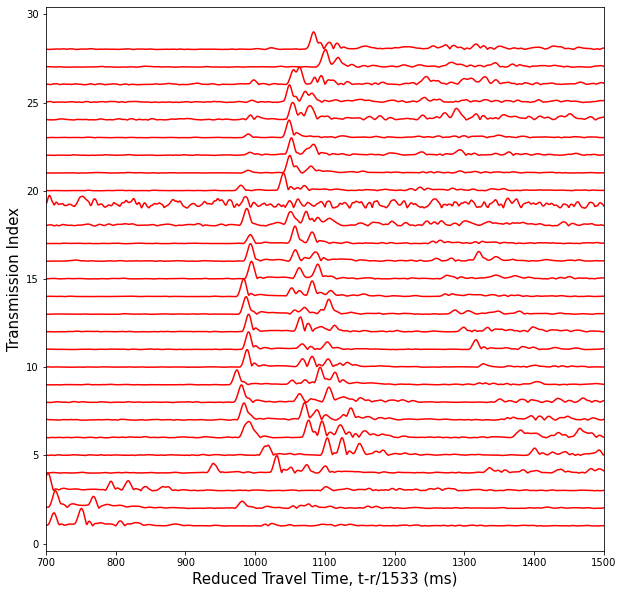

In [203]:
plt.figure(figsize=(10,10))
vel = 1533
for i in range(1,29):
    
    Buoy_lat = 25+GPSlat['Buoy'].values[i]/60
    Buoy_lon = 121+GPSlon['Buoy'].values[i]/60
    Ship_lat = 25+GPSlat['Ship'].values[i]/60
    Ship_lon = 121+GPSlon['Ship'].values[i]/60
    dist,az,baz = gps2dist_azimuth(Ship_lat,Ship_lon,Buoy_lat,Buoy_lon)
    # print(dist)
    plt.plot(range(len(ShiptoBuoy_data['time'][i])),ShiptoBuoy_data['arr'][i]/max(ShiptoBuoy_data['arr'][i])+i,'r')
    # plt.plot((ShiptoBuoy_data['time'][i]-dist/vel)*1000,ShiptoBuoy_data['arr'][i]/max(ShiptoBuoy_data['arr'][i])+i,'r')
    # plt.plot((BuoytoShip_data['time'][i]-dist/vel)*1000,BuoytoShip_data['arr'][i]/max(BuoytoShip_data['arr'][i])+i,'b')
plt.xlim(700,1500)
plt.xlabel('Reduced Travel Time, t-r/1533 (ms)',fontsize=15)
plt.ylabel('Transmission Index',fontsize=15)
plt.show()

## Import bellhop amp. (delayandsum)

In [419]:
index=0
envelop4= pd.read_csv('raysimu_4/time_001/envelop.csv')
envelop8= pd.read_csv('raysimu_8/time_001/envelop.csv')
envelop9= pd.read_csv('raysimu_9/time_001/envelop.csv')
envelop10= pd.read_csv('raysimu_10/time_001/envelop.csv')

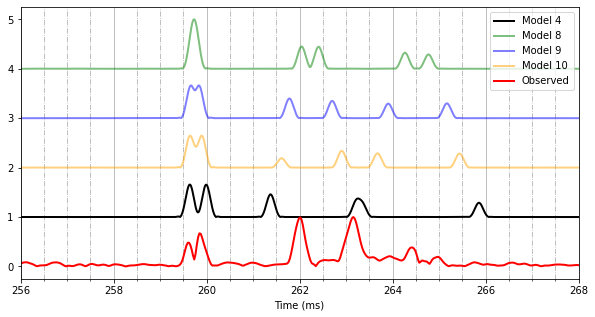

In [439]:
shift = 18.7
k = max(envelop8['envelop'])
fig, ax = plt.subplots(figsize=(10,5))
# fig ,= plt.figure()

plt.plot((envelop4['time'])*1000+shift,envelop4['envelop']/k+1,'k',lw=2,label='Model 4')
plt.plot((envelop8['time'])*1000+shift,envelop8['envelop']/k+4,'g',lw=2,label='Model 8',alpha=0.5)
plt.plot((envelop9['time'])*1000+shift,envelop9['envelop']/k+3,'blue',lw=2,label='Model 9',alpha=0.5)
plt.plot((envelop10['time'])*1000+shift,envelop10['envelop']/k+2,'orange',lw=2,label='Model 10',alpha=0.5)
# plt.plot((envelop['time'])*1000+shift,envelop['envelop']/(max(envelop['envelop'])),'k',label=f'Model-Shift {shift}ms',alpha=0.5)
plt.plot((BuoytoShip_data['time'][index])*1000,BuoytoShip_data['arr'][index]/max(BuoytoShip_data['arr'][index]),lw=2,c='r',label='Observed')

plt.legend(loc=1)
plt.xlabel('Time (ms)')
# plt.xlim(800,830)
# plt.xlim(910,950)
plt.grid(axis='x',which='minor',ls='-.')
plt.grid(axis='x',which='major')
# plt.xlim(1160,1175)
# plt.xlim(496,510)
plt.xlim(256,268)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
plt.savefig('comparsion.png',dpi=150)

ValueError: keyword grid_lines is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

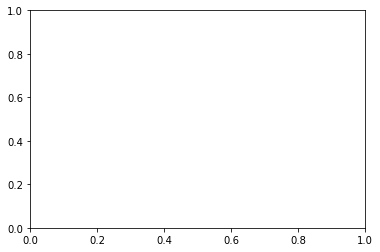

In [435]:
plt.grid(lines='--')